# Linear regression 1

In this notebook, we recall some basic facts about vectors and matrices. Our motivation is to understand the linear regression model, which is a simple yet powerful tool for predicting a continuous target variable. To illustrate the concepts, we will use the concrete compressive strength dataset `../data/regression/concrete_compressive_strength/train.csv`. 

As usual, we begin by importing the necessary libraries and loading the dataset.

In [14]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the concrete compressive strength dataset
df = pd.read_csv('../data/regression/concrete_compressive_strength/train.csv')

# display some info
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')
df.head()

There are 824 rows and 9 columns in the dataset.


,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,28,37.81
1,355.0,19.0,97.0,145.0,13.1,967.0,871.0,28,44.03
2,134.7,0.0,165.7,180.2,10.0,961.0,804.9,28,13.29
3,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,100,47.74
4,150.0,237.0,0.0,174.0,12.0,1069.0,675.0,28,37.43


# Preliminaries

## Direct products of sets
Let $S_1,\dotsc,S_n$ be a finite collection of non-empty sets. The *direct* (or *Cartesian*) *product* of these sets is the set
$$S_1 \times \dotsb \times S_n = \{ (x_1,\dotsc,x_n) \mid x_i \in S_i \textup{ for } i=1,\dotsc,n \}.$$
The reason for the "$\times$" notation is that if each $S_i$ is a finite set (of size $|S_i|$), then the size of the direct product is the product of the sizes: $$|S_1 \times \dotsb \times S_n| = |S_1| \times \dotsb \times |S_n|.$$

## The space $\mathbb{R}^n$
The real line is denoted $\mathbb{R}$, and sometimes, $\mathbb{R}^1$. The notation $\mathbb{R}^n$ represents the direct product of $\mathbb{R}$ with itself $n$ times:
\begin{align*}
    \mathbb{R}^n & \coloneqq \underbrace{\mathbb{R} \times \dotsb \times \mathbb{R}}_{n \textup{ copies}} \\
                & = \{ (x_1,\dotsc,x_n) \mid x_1,\dotsc,x_n \in \mathbb{R} \}.
\end{align*}
These are the most intuitive spaces to do geometry and visualize things, and as such, elements of $\mathbb{R}^n$ are often referred to as *points*. For example, $\mathbb{R}^1$ is simply the real line, $\mathbb{R}^2$ is a plane, $\mathbb{R}^3$ is an abstract representation of physical 3d-space, and so on.

## Vectors
When we want to do arithmetic with points in $\mathbb{R}^n$, such as addition and multiplication, it becomes appropriate to consider them as **vectors**. Informally, a vector is an arrow that starts at the origin and ends at some point. For us, vectors will always mean (unless otherwise specified) ***column vectors**, denoted as follows:
\begin{equation*}
    \mathbf{x} = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^n.
\end{equation*}
When we want to instead work with **row vectors**, we use the superscript "$(\cdot)^T$" (for **transpose**) to denote our vector:
\begin{equation*}
    \mathbf{x}^T = [x_1 \, \dotsb \, x_n] \in \mathbb{R}^n.
\end{equation*}
Since the transpose of a row is a column, the notation $\mathbf{x} = [x_1 \, \dotsb \, x_n]^T$ means that $\mathbf{x}$ is a column vector.

## Rows and columns of datasets
Suppose we have a ML provlem with features $X_1,\dotsc,X_n$ and target $Y$. For simplicity, assume that all features and target are continuous variables. Suppose there are $m$ instances or observations for which we know the values of $X_1,\dotsc,X_n,Y$. These values can be put together into a labelled dataset that looks like:
\begin{equation*}
    \begin{bmatrix}
        x_{11}  & \dotsb & x_{1n} & y_1\\
        \vdots  & \ddots & \vdots & \vdots\\
        x_{m1}  & \dotsb & x_{mn} & y_m
    \end{bmatrix}.
\end{equation*}
We write $\mathbb{R}^{m \times n}$ to denote the set of $m\times n$ matrices. The **design matrix** is the $m \times n$ matrix $$X = [x_{ij}] \in \mathbb{R}^{m \times n}.$$ (This notation means that the entry in $i$-th row and $j$-th column is $x_{ij}$.) Denoting the first column of the dataset as $\mathbf{1} \in \mathbb{R}^m$, we can write the dataset as
\begin{equation*}
    \textup{Dataset } = \begin{bmatrix} \; X & \mathbf{y} \; \end{bmatrix} \in \mathbb{R}^{m \times (n+1)}.
\end{equation*}
Let's examine the rows and columns for a moment.
- **Rows.** Observe that the $i$-th row of $X$ is
\begin{equation*}
    \mathbf{x}_i^T = \begin{bmatrix} \; x_{i1} & \dotsb & x_{in} \; \end{bmatrix} \in \mathbb{R}^n.
\end{equation*}
NOTE: we think of $\mathbf{x}_i$ as a column vector, so that $\mathbf{x}_i^T$ is a row vector (the actual row in the dataset).
By the **feature space**, we mean the space $\mathbb{R}^n$ of all possible row vectors. The $i$-th vector $\mathbf{x}_i^T$ in the feature space corresponds to an instance, and the $j$-th coordinate of $\mathbf{x}_i^T$ records the value of $X_j$ for that instance. 
- **Columns.**  The columns of $X$ are vectors in $\mathbb{R}^m$; each column $\mathbf{v}_j$ corresponds to the feature $X_j$. The last column $\mathbf{y} \in \mathbb{R}^m$ corresponds to the target. We often summarize this info by writing
\begin{equation*}
    \textup{Dataset } = \begin{bmatrix} \; \mathbf{v}_1 & \dotsb & \mathbf{v}_n & \mathbf{y} \; \end{bmatrix} = \begin{bmatrix} \; X & \mathbf{y} \; \end{bmatrix} \in \mathbb{R}^{m \times n}.
\end{equation*}

## Our framework for ML
Recall that in our framework of supervised ML, there exists a "ground truth" function $\mathbf{F}$ from the feature space $\mathbb{R}^n$ to the target space $\mathbb{R}$ (space of possible $Y$-values) such that, for every row $(\mathbf{x}^T,y) \in \mathbb{R}^n \times \mathbb{R}$, we have
\begin{equation*}
    y = \mathbf{F}(\mathbf{x}) + \epsilon,
\end{equation*}
where $\epsilon$ is some small error term. 

For example, in our current dataset `df`, there are $n=8$ features, so our feature space is $\mathbb{R}^8$. Let's recall what the features are by loading the "data_description.csv" file.

In [18]:
vars = pd.read_csv('../data/regression/concrete_compressive_strength/data_description.csv')
# display only the 'name', 'new_col_name', 'type', and 'role' columns
vars[['name', 'new_col_name', 'type', 'role']]

,name,new_col_name,type,role
0,Cement,X1,Continuous,Feature
1,Blast Furnace Slag,X2,Integer,Feature
2,Fly Ash,X3,Continuous,Feature
3,Water,X4,Continuous,Feature
4,Superplasticizer,X5,Continuous,Feature
5,Coarse Aggregate,X6,Continuous,Feature
6,Fine Aggregate,X7,Continuous,Feature
7,Age,X8,Integer,Feature
8,Concrete compressive strength,Y,Continuous,Target


## Linear regression (row perspective)

The linear regression model is a simple yet powerful tool for predicting a continuous target variable. Here, our assumption is that the ground truth function $\mathbf{F}$ is a linear function of the features. Thus, we assume that there exists some vector of parameters $\mathbf{w} = \begin{bmatrix} \; b & w_1 & \dotsb & w_n \; \end{bmatrix} \in \mathbb{R}^{n+1}$ such that
\begin{equation*}
    \mathbf{F}(X_1,\dotsc,X_n) = b + w_1 X_1 + \dotsb + w_n X_n,
\end{equation*}
and hence, the target is given by
\begin{align*}
    Y   & = \mathbf{F}(X_1,\dotsc,X_n) + \epsilon \\
        & = b + w_1 X_1 + \dotsb + w_n X_n + \epsilon,
\end{align*}
where $\epsilon$ is some small error term. Equivalently, for every row $[\; \mathbf{x}_i^T \; y_i \;] = \begin{bmatrix} \; x_{i1} & \dotsb & x_{in} & y_i \; \end{bmatrix} \in \mathbb{R}^{n}$ in our design matrix, we have
\begin{align*}
    y_i     & = \mathbf{F}(x_{i1},\dotsc,x_{in}) + \epsilon_i,\\
            & =  b + w_1 x_{i1} + \dotsb + w_n x_{in} + \epsilon_i.
\end{align*}
Each $w_i$ can be interpreted as the weight or importance of the $i$-th feature in predicting the target; If all other features are held constant, then a one-unit increase in $X_i$ will result in a $w_i$-unit increase in the target. (Can you rephrase this in terms of partial derivatives?)  The parameter $b$ is called the **bias** or **intercept** term. It can be interpreted as the expected value of the target when all features are zero. Putting them all together, a linear model assumes that the target is a constant (the bias), plus a wighted sum of the features, plus some noise.

## Augmented design matrix
To simplify the notation, it will be convenient to *augment* our design matrix with an additional "dummy" feature $X_0$ which simply takes the value $x_{i0} = 1$ for all instances $i=1,\dotsc,m$. Thus, our augmented design matrix (which we denote by $\overline{X}$) will have a first column of ones $\mathbf{1} \in \mathbb{R}^m$, and the remaining columns will be the original features:
\begin{equation*}
    \overline{X} = \begin{bmatrix} 
        x_{10}  & x_{11} & \dotsb & x_{1n} \\ 
        \vdots  & \vdots & \ddots & \vdots \\ 
        x_{m0}  & x_{m1} & \dotsb & x_{mn} \end{bmatrix} \in \mathbb{R}^{m \times (n+1)}.
\end{equation*}
Note that the $i$-th row of $\overline{X}$ is 
\begin{align*}
    \mathbf{x}_i^T    & = \begin{bmatrix} \; x_{i0} & x_{i1} & \dotsb & x_{in} \; \end{bmatrix} \\
                    & = \begin{bmatrix} \; 1 & x_{i1} & \dotsb & x_{in} \; \end{bmatrix} \in \mathbb{R}^{n+1}.
\end{align*}

## Dot product
The **dot product** of two vectors $\mathbf{u},\mathbf{v} \in \mathbb{R}^n$ is the sum of the products of their corresponding entries:
\begin{equation*}
    \mathbf{u} \cdot \mathbf{v} = u_1v_1 + \dotsb + u_nv_n.
\end{equation*}
Note that $\mathbf{u}^T$ can be thought of as a $1 \times n$ matrix, and $\mathbf{v}$ can be thought of as an $n \times 1$ matrix. Then, the dot product is simply given by matrix multiplication:
\begin{equation*}
    \mathbf{u} \cdot \mathbf{v} = \mathbf{u}^T \mathbf{v} \in \mathbb{R}.
\end{equation*}

**Example** The following example illustrates how to compute the dot product of two vectors in Python using vectorized code.

In [20]:
# Create sample vectors
v1 = np.array([1, 2, 3, 4, 5])
v2 = np.array([2, 3, 4, 5, 6])

# Method 1: Using np.dot()
dot1 = np.dot(v1, v2)

# Method 2: Using @ operator
dot2 = v1 @ v2

# Method 3: Using element-wise multiplication and sum
dot3 = np.sum(v1 * v2)

# Verify all methods give same result
print(f"np.dot(): {dot1}")
print(f"@ operator: {dot2}")
print(f"sum of products: {dot3}")

np.dot(): 70
@ operator: 70
sum of products: 70


## Linear model via dot products
Our reason for augmenting the design matrix is that it allows us to compactly express the linear model as a dot product. To start, let's re-write our bias parameter $b$ as $w_0$, so that our parameter vector is now $$\mathbf{w} = \begin{bmatrix} \; w_0 & w_1 & \dotsb & w_n \; \end{bmatrix} \in \mathbb{R}^{n+1}.$$ 
    Then, the linear model $\mathbf{F}: \mathbb{R}^n \to \mathbb{R}$ can be written as the dot product
\begin{equation*}
    \mathbf{F}(\mathbf{x}) = \mathbf{x}^T \mathbf{w}.
\end{equation*}
So, for the $i$-th instance, the model predicts the target as
\begin{equation*}
    \hat{y}_i = \mathbf{F}(\mathbf{x}_i) =  \mathbf{x}_i^T \mathbf{w}.
\end{equation*}
By our assumption, the target for the $i$-th instance is given by
\begin{align*}
    y_i  & = \mathbf{F}(\mathbf{x}_i) + \epsilon_i \\
        & = \mathbf{x}_i^T \mathbf{w} + \epsilon_i,
\end{align*}
where $\epsilon_i$ is some small error term. During model training, we want to focus on the error term, so we rearrange the equation to get
\begin{align*}
    \epsilon_i  & = y_i - \hat{y}_i \\
                & = y_i - \mathbf{x}_i^T \mathbf{w}.
\end{align*}

## Measuring the error
Recall that our **loss function** is a function of the parameters that measures how "good" the predictions of the model are *on our train set*. To measure the errors of our predictions, we can follow a general schema:

1. For each instance $i=1,\dotsc,m$, compute the difference $\epsilon_i = y_i - \hat{y}_i$, and compute the error as some function of $\epsilon_i$.
2. Average the errors over all instances to get the *mean error per instance*.

A naive first attempt would be to take $\epsilon_i$ itself as our for each instance. However, this would be problematic, since positive and negative errors could cancel each other out. To avoid this, we want the errors to all be non-negative. Thus, there are two natural choices for the error function:

1. **Mean Absolute Error (MAE):** The error for the $i$-th instance is $|\epsilon_i| = |y_i - \hat{y}_i|$. Geomtrically, this is simply the distance between the actual and predicted values on the target axis. Averaging over the instances $i=1,\dotsc,m$, we get the MAE:
\begin{align*}
    \textup{MAE}(\mathbf{w})    & = \frac{1}{m} \sum_{i=1}^m |\epsilon_i|\\
                                & = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|\\
                                & = \frac{1}{m} \sum_{i=1}^m |y_i - \mathbf{x}_i^T \mathbf{w}|.
\end{align*}
2. **Mean Squared Error (MSE):** The error for the $i$-th instance is $(\epsilon_i)^2 = (y_i - \hat{y}_i)^2$. Geomtrically, this is the square of the distance between the actual and predicted values on the target axis. Averaging over the instances $i=1,\dotsc,m$, we get the MSE:
\begin{align*}
    \textup{MSE}(\mathbf{w})    & = \frac{1}{m} \sum_{i=1}^m \epsilon_i^2\\
                                & = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2\\
                                & = \frac{1}{m} \sum_{i=1}^m (y_i - \mathbf{x}_i^T \mathbf{w})^2.
\end{align*}

**Example.** Below, we generate some random predictions of the target for the first 100 instances in our dataset `df`. We then compute the MAE and MSE for these predictions.

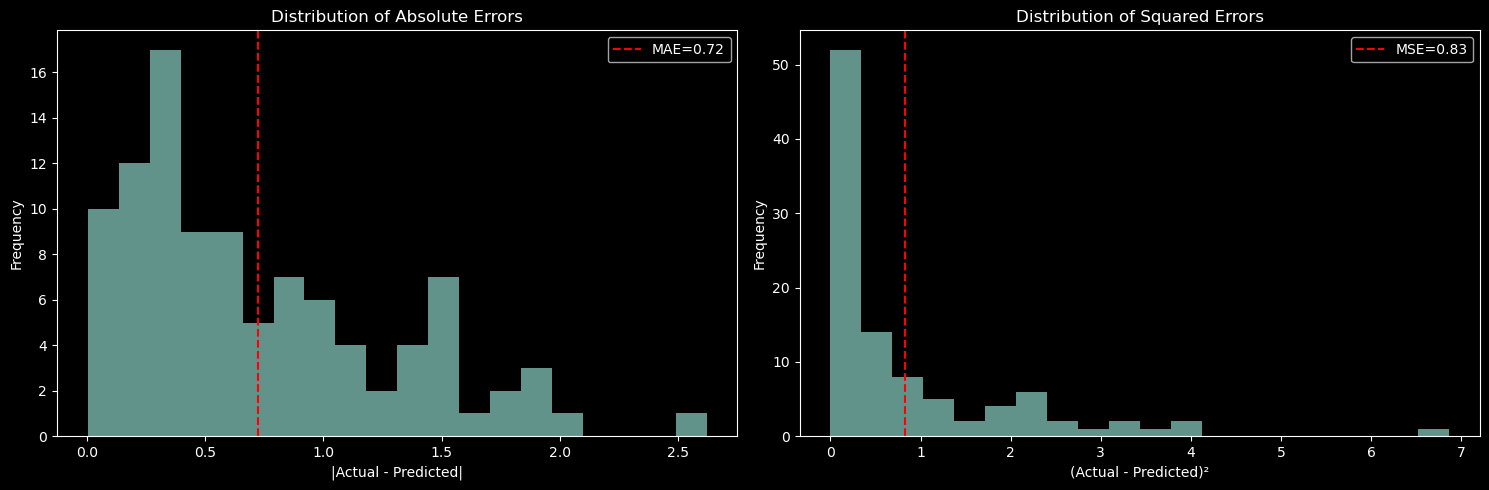

In [19]:
y_true = df['Y'].head(100)

# Generate predictions with random normal errors
np.random.seed(42)  # for reproducibility
errors = np.random.normal(0, 1, size=100)
y_pred = y_true + errors

# Calculate metrics
mae = np.mean(np.abs(y_true - y_pred))
mse = np.mean((y_true - y_pred)**2)

# Create side-by-side visualization
plt.figure(figsize=(15, 5))

# Plot absolute errors
plt.subplot(121)
plt.hist(np.abs(y_true - y_pred), bins=20, alpha=0.7)
plt.axvline(mae, color='r', linestyle='--', label=f'MAE={mae:.2f}')
plt.title('Distribution of Absolute Errors')
plt.xlabel('|Actual - Predicted|')
plt.ylabel('Frequency')
plt.legend()

# Plot squared errors
plt.subplot(122)
plt.hist((y_true - y_pred)**2, bins=20, alpha=0.7)
plt.axvline(mse, color='r', linestyle='--', label=f'MSE={mse:.2f}')
plt.title('Distribution of Squared Errors')
plt.xlabel('(Actual - Predicted)²')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Comparing MSE and MAE
There a couple key differences between MAE and MSE:

1. **Sensitivity to outliers.** The MSE is more sensitive to outliers than the MAE. This is because the MSE squares the errors, so that large errors are penalized more heavily. Similarly, errors less than $1$ are made even smaller when squared, resulting in the distribution on the right: lot's of values clustered near $0$, and long tail of outliers. In contrast, the MAE treats all errors equally, leading to a more spread out distribution of errors.
2. **Differentiability.** The MSE (considered as a function of the parameters $\mathbf{w}$) is differentiable everywhere, while the MAE is not differentiable at zero. This means that the MSE can be minimized using calculus, while the MAE cannot. This is a key reason why the MSE is more commonly used in practice, because for large datasets, the optimization algorithms used to minimize the loss function (namely, the method of gradient descent) require differentiability!

# Linear regression (column perspective)

It is often useful to think of the linear regression model from the perspective of columns. In this view, we think of the dataset as a collection of columns, and the linear model as a linear combination of these columns. First, let's review some concepts from linear algebra. 

## Displacement vectors
Vectors should usually be thought of as arrows starting at the origin. Very often, it is useful to visualize vectors with different starting points. When the starting point is not the origin, we refer to these as *displacement vectors*. 

The term "displacement" arises because displacement vectors naturally arise in the context of physics: if an object starts at a point $P = (a_1,\dotsc,a_n)$ and ends at $Q = (b_1,\dotsc,b_n)$, then the displacement of the object is given by the displacement vector 
\begin{equation*}
    \vec{PQ} = \begin{bmatrix} b_1 - a_1 \\ \vdots \\ b_n - a_n \end{bmatrix} \in \mathbb{R}^n.
\end{equation*}

## Distance between points
The **norm** or **magnitude** of a vector $\mathbf{v} = \begin{bmatrix} \; v_1 & \dotsb & v_m \; \end{bmatrix}^T \in \mathbb{R}^m$ is simply its length. The formula for the length is a generalization of the Pythagorean Theorem:
\begin{equation*}
    || \mathbf{v} ||^2 = v_1^2 + \dotsb + v_n^2.
\end{equation*}
Given points $P = (a_1,\dotsc,a_m)$ and $Q = (b_1,\dotsc,b_m) \in \mathbb{R}^m$, the *distance* between $P$ and $Q$ is defined to be the norm of the displacement vector $\vec{PQ}$:
\begin{equation*}
    \textup{Distance between $P$ and $Q$ } = ||\vec{PQ}|| = \sqrt{ \sum_{i=1}^m (b_i -a_i)^2 }.
\end{equation*}
Treating $P$ and $Q$ as vectors $\mathbf{u}$ and $\mathbf{v}$, we note that the distance is related to the dot product by the formula
\begin{align*}
    ||\mathbf{u} - \mathbf{v}||^2 & = (\mathbf{u} - \mathbf{v}) \cdot (\mathbf{u} - \mathbf{v}) \\
    & = \mathbf{u} \cdot \mathbf{u} - 2\mathbf{u} \cdot \mathbf{v} + \mathbf{v} \cdot \mathbf{v} \\
    & = ||\mathbf{u}||^2 - 2\mathbf{u} \cdot \mathbf{v} + ||\mathbf{v}||^2.
\end{align*}

**Remark.** The distance formula above is sometimes called the *Euclidean norm* or *L2 norm*. There are other norms that can be used to measure the length of a vector. The most common ones are:

- **$L_1$-norm:** 
This is the sum of the absolute values of the entries:
$$||\mathbf{v}||_1 = |v_1| + \dotsb + |v_m|.$$ 
This is also called the *Manhattan norm* or *Taxicab norm* because it measures the distance between two points in a city if you can only travel along the grid of streets.
- $L_{\infty}$**-norm:** 
This is the maximum of the absolute values of the entries: $$ ||\mathbf{v}||_{\infty} = \max \{|v_1|,\dotsc,|v_m|\}. $$  
This is also called the *supremum norm* or *maximum norm*.

## Linear combinations
Vectors $\mathbf{u}$ and $\mathbf{v}$ in the same space $\mathbb{R}^m$ can be added to give a new vector $\mathbb{u}+\mathbb{v} \in \mathbb{R}^m$; the addition is done coordinate-wise. Note that if we view points $P$ and $Q$ as vectors $\mathbf{u}$ and $\mathbf{v}$, then the displacement vector is simply $\vec{PQ} = \mathbf{v} - \mathbf{u}$. 

Given a scalar $\lambda \in \mathbb{R}$, we can scale $\mathbf{v}$ by $\lambda$ to get a new vector $\lambda\mathbf{v} \in \mathbb{R}^m$. Given vectors $\mathbf{v}_1,\dotsc,\mathbf{v}_n,\mathbf{y} \in \mathbb{R}^m$, we say that $\mathbf{y}$ is a *linear combination$ of the $\mathbf{v}_i$'s if there exist scalars $c_1,\dotsc,c_n \in \mathbb{R}$  such that
\begin{equation*}
    \mathbf{y} = c_1\mathbf{v}_1 + \dotsb + c_n \mathbf{v}_n \in \mathbb{R}^m.
\end{equation*}

The **span** of the vectors $\mathbf{v}_1,\dotsc,\mathbf{v}_n$ is the set of all linear combinations:
\begin{equation*}
    \textup{span}(\mathbf{v}_1,\dotsc,\mathbf{v}_n) = \{c_1\mathbf{v}_1 + \dotsb + c_n \mathbf{v}_n \in \mathbb{R}^m \mid c_1,\dotsc,c_n \in \mathbb{R} \}.
\end{equation*}
Note that $\textup{span}(\mathbf{v}_1,\dotsc,\mathbf{v}_n)$ is a subset of $\mathbb{R}^m$. 

## Linear model via linear combinations
Recall that our augmented design matrix $\overline{X}$ has $n+1$ columns $\mathbf{v}_0,\dotsc,\mathbf{v}_n \in \mathbb{R}^m$, where the first column $\mathbf{v}_0$ is the "all-$1$'s" vector $\mathbf{1} \in \mathbb{R}^m$. The linear model can be expressed as a linear combination of these columns:
\begin{align*}
    \hat{\mathbf{y}}    & = \overline{X} \mathbf{w} \\
                        & = \begin{bmatrix} \; \mathbf{v}_0 & \mathbf{v}_1 & \dotsb & \mathbf{v}_n \; \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{bmatrix} \\
                        & = w_0\mathbf{v}_0 + w_1\mathbf{v}_1 + \dotsb + w_n\mathbf{v}_n.
\end{align*}
This immediately implies the following: *In a linear model, the predicted target is a linear combination of the columns of the augmented design matrix; that is:*
\begin{equation*}
    \hat{\mathbf{y}} = \sum_{j=0}^n w_j \mathbf{v}_j \textup{ lies in } \textup{span}(\mathbf{v}_0,\dotsc,\mathbf{v}_n).
\end{equation*}

Note that the errors $\epsilon_i$ for each instance can be packaged together into a single error vector $\mathbf{\epsilon} \in \mathbb{R}^m$ (called the **residuals**), and the target vector can be written as $\mathbf{y} \in \mathbb{R}^m$. Then, we have
\begin{align*}
    \mathbf{y}  & = \hat{\mathbf{y}} + \vec{\epsilon} \\
                & = \overline{X} \mathbf{w} + \vec{\epsilon}.
                & = \sum_{j=0}^n w_j \mathbf{v}_j + \vec{\epsilon}.
\end{align*}
Again, when we work with the loss function, we want to focus on the error term, so we rearrange the equation to get the residual vector on the left-hand side:
\begin{equation*}
    \vec{\epsilon} = \mathbf{y} - \hat{\mathbf{y}} = \mathbf{y} - \sum_{j=0}^n w_j \mathbf{v}_j.
\end{equation*}

![alt text](image.png)